<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
#matriz encripatada
A= np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

#matriz de mensaje
M= np.matrix([[47,49,-19,257,487],
              [10,-9,63,137,236],
              [79,142,-184,372,536],
              [59,70,-40,332,588]])

In [ ]:
#comprobando que la  matriz es invertible
det_A= np.linalg.det(A) #usando libreria
print(f'el resultado del determinante es {det_A}, por lo tanto es invertible')


el resultado del determinante es 0.9999999999999968, por lo tanto es invertible


In [ ]:
#hallando la inversa de la matriz encriptada
A_inversa=np.linalg.inv(A)
sp.Matrix(A_inversa) #para ver la matriz inversa de manera simbolica

Matrix([
[             14.0,               1.0,              -2.0,              1.0, -4.99999999999999],
[ 22.0000000000001, -7.00000000000002, -4.00000000000001, 6.00000000000002, -19.0000000000001],
[             13.0, -3.00000000000001, -2.00000000000001, 3.00000000000001,             -10.0],
[-2.00000000000001,               1.0,               1.0,             -1.0,  2.00000000000001],
[             -2.0,                 0,                 0,                0,               1.0]])

In [ ]:
B= np.matmul(M,A_inversa)
sp.Matrix(B)

Matrix([
[0.999999999999318, 18.0000000000001,  5.0, 26.9999999999999, 25.0000000000001],
[ 14.9999999999998, 21.0000000000001, 27.0, 7.99999999999994, 1.00000000000014],
[ 21.9999999999993, 9.00000000000008, 14.0, 6.99999999999992, 27.0000000000003],
[ 5.99999999999932, 21.0000000000001, 14.0, 26.9999999999999, 27.0000000000003]])

In [ ]:
#abecedeario
C = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']

#para recorrer los elementos de la matriz
dim = np.shape(B)
mensaje = []

for i in range(0,dim[0]):
  for j in range(0,dim[1]):
    mensaje.append(C[round(B[i,j]-1)])

mensaje=''.join(mensaje)
mensaje


'ARE YOU HAVING FUN  '

## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

In [ ]:
#datos que se tienen
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

In [ ]:
#se define el valor de x
X= np.zeros((len(x1),2))
X[:,0]=1 # la primera columna la llena de 1
X[:,1]=x1 #la segunda columna la llena con los valores de x1
X= np.matrix(X)

sp.Matrix(X)

Matrix([
[1.0,                0],
[1.0, 1.11111111111111],
[1.0, 2.22222222222222],
[1.0, 3.33333333333333],
[1.0, 4.44444444444444],
[1.0, 5.55555555555556],
[1.0, 6.66666666666667],
[1.0, 7.77777777777778],
[1.0, 8.88888888888889],
[1.0,             10.0]])

In [ ]:
sp.Matrix(y) #conociendo los valores de y

Matrix([
[-0.978723132963017],
[  1.43065050464237],
[  1.13136594952735],
[  2.53316974928609],
[  4.04189165083647],
[  4.24230485702578],
[  6.88548493705233],
[  7.41446268463124],
[  7.66289693270213],
[  9.07940854800307]])

In [ ]:
#para conocer el valor de theta
xt= np.transpose(X) #traspuesta de la matriz x
xinv= np.linalg.inv(xt*X)
s=xinv*xt
theta= np.dot(s,y)
sp.Matrix(theta)

Matrix([[-0.532665620201633, 0.975391377655203]])

In [ ]:
theta_t= np.transpose(theta)
Y= X*theta_t #el orden lo tuve que cambiar para que las dimensiones concordaran

sp.Matrix(Y)

Matrix([
[-0.532665620201633],
[ 0.551102577193038],
[  1.63487077458771],
[  2.71863897198238],
[  3.80240716937705],
[  4.88617536677172],
[  5.96994356416639],
[  7.05371176156106],
[  8.13747995895573],
[   9.2212481563504]])

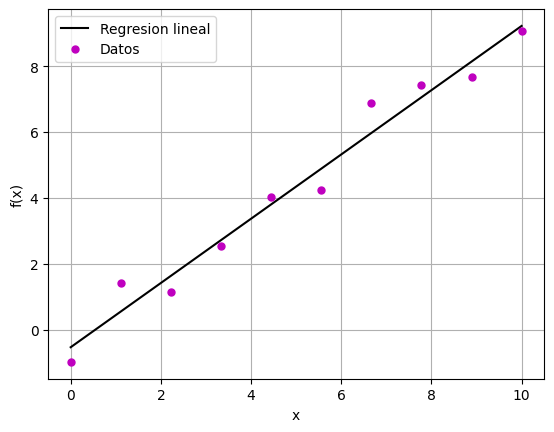

In [ ]:
#grafico de la regresion lineal
plt.plot(x1,Y,'k',label='Regresion lineal') #recta
plt.plot(x1,y,'.m', label='Datos', markersize=10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

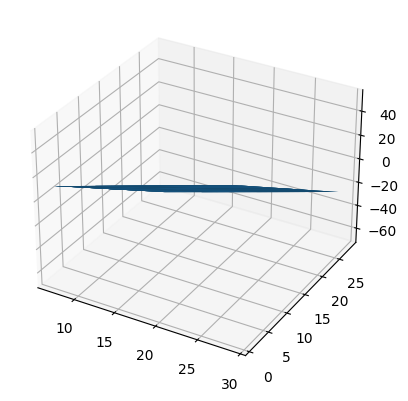

In [ ]:
#generalizando
N = 10
x1_bidim = np.random.randint(30,size=N) #toco cambiar el linspace porque al hacer la inversa es una matriz singular
x2_bidim = np.random.randint(30,size=N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y_bidim = 2*(x1_bidim+noise1) - 3*(x2_bidim+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1_bidim, X2_bidim = np.meshgrid(x1_bidim,x2_bidim)
Y = 2*X1_bidim - 3*X2_bidim + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1_bidim, X2_bidim, Y)
# scatter = ax.scatter(x1, x2, y,"-")

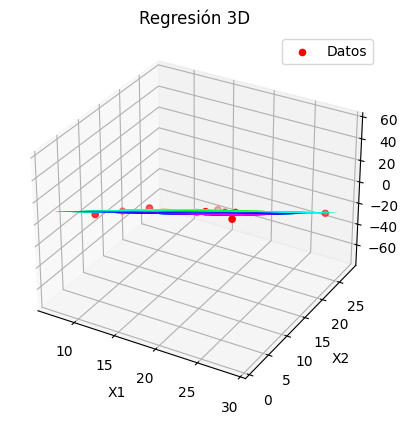

In [ ]:
#regresion
def regresion_bidimensional(x1_bidim,x2_bidim,y_bidim):
  n1=len(x1_bidim)
  n2=len(x2_bidim)
  n3=len(y_bidim)

  if n1==n2 and n2==n3:
  #Definiendo la matrix X
    x_bidim=np.zeros((len(x1_bidim),3))
    x_bidim[:,0]=1
    x_bidim[:,1]=x1_bidim
    x_bidim[:,2]=x2_bidim

    x_bidim=np.matrix(x_bidim)

    xt_bidim=np.transpose(x_bidim)
    xinv_bidim=np.linalg.inv(xt_bidim*x_bidim)
    dot= xinv_bidim*xt_bidim

    #Encontrando el valor de thetha
    theta_bidim=np.dot(dot,y_bidim)

    #Graficando el resulado
    X1_bidim, X2_bidim = np.meshgrid(x1_bidim,x2_bidim)
    Y = theta_bidim[0,1]*X1_bidim +theta_bidim[0,2]*X2_bidim + theta_bidim[0,0]
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X1_bidim, X2_bidim,Y,cmap='hsv')
    ax.scatter(x1_bidim, x2_bidim, y_bidim,color='red', label='Datos')
    ax.set_title('Regresión 3D')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.legend()
    return surf

  else:
    m='Las dimesiones de los vectores ingresados no son las corecctas'
    return m


regresion_bidimensional(x1_bidim,x2_bidim,y_bidim)

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [11]:
#diagonalizacion de A
A=np.matrix([[2,-1,1],
             [0,3,-1],
             [2,1,3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

D= np.diag(eigenvalues) #matriz diagonal de valorees propios
P= eigenvectors #matriz vectores propios

A_diag= P @ D @ np.linalg.inv(P)

sp.Matrix(A_diag)

Matrix([
[                 2.0 + 4.22907063254667e-10*I, -1.0 + 4.22907063254666e-10*I,  0.999999999999999 - 2.16182500411848e-24*I],
[1.88737914186277e-15 - 4.45946262616037e-10*I,  3.0 - 4.45946262616037e-10*I, -0.999999999999998 - 1.79300708195401e-24*I],
[                 2.0 + 2.91325159245968e-11*I,  1.0 + 2.91325159245984e-11*I,                3.0 + 1.30125162295576e-24*I]])

##**$x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$**

In [17]:
x0= sp.Symbol('x_0')
y0= sp.Symbol('y_0')
z0= sp.Symbol('z_0')

c= sp.Matrix([x0,y0,z0])

t= sp.Symbol('t')
f_j= sp.Matrix([[sp.exp(eigenvalues[0]*t),0,0],
               [0,sp.exp(eigenvalues[1]*t),t*sp.exp(eigenvalues[1]*t)],
               [0,0,sp.exp(eigenvalues[2]*t)]])

p= sp.Matrix(P)
p_inv= sp.Matrix(np.linalg.inv(P))


#solucion para todo tiempo
sol= p @ f_j @ p_inv @ c
sol


Matrix([
[     x_0*((0.445210242790592 + 51349550.6401742*I)*(t*(-0.577350269189626 + 9.73718355402347e-9*I)*exp(t*(2.0 + 1.68652966381927e-8*I)) + (-0.577350269189626 - 9.73718355402347e-9*I)*exp(t*(2.0 - 1.68652966381927e-8*I))) + 0.5*exp(4.0*t) + (-0.577350269189626 + 9.73718355402347e-9*I)*(0.420815160993847 - 51349550.6401742*I)*exp(t*(2.0 + 1.68652966381927e-8*I))) + y_0*((0.878222944682811 + 51349550.6401742*I)*(t*(-0.577350269189626 + 9.73718355402347e-9*I)*exp(t*(2.0 + 1.68652966381927e-8*I)) + (-0.577350269189626 - 9.73718355402347e-9*I)*exp(t*(2.0 - 1.68652966381927e-8*I))) - 1.11022302462516e-16*exp(4.0*t) + (-0.577350269189626 + 9.73718355402347e-9*I)*(0.853827862886066 - 51349550.6401742*I)*exp(t*(2.0 + 1.68652966381927e-8*I))) + z_0*((0.433012701892219 - 2.47886750336584e-8*I)*(t*(-0.577350269189626 + 9.73718355402347e-9*I)*exp(t*(2.0 + 1.68652966381927e-8*I)) + (-0.577350269189626 - 9.73718355402347e-9*I)*exp(t*(2.0 - 1.68652966381927e-8*I))) + 0.5*exp(4.0*t) + (-0.5773

vemos que la matriz tiene un valor propio de multiplicidad dos, por lo tanto no es diagnalizable, debemos recurrir a una matriz gauss jordan para poder diagonalizar.

Para ello, primero se cálcula un vector generalizado.
$(A-2I)\vec{v_2}=\vec{v_1}$
Donde $v_1$ es el vector asociado al valor $\lambda=2$.

In [ ]:
#vector generalizado
x=sp.Symbol('x')
y=sp.Symbol('y')
z=sp.Symbol('z')
C=sp.Matrix(A)-2*sp.eye(3)
v_2=sp.Matrix([x,y,z])
v_1=sp.Matrix(eigvects[:,1])

sol=sp.solve(C*v_2-v_1,[x,y,z])
sol

[]

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A